In [1]:
f = open("out_even.txt", "r")
data = [line.strip() for line in f]
sessions = 8
params = 1
data

['10',
 '4.6739',
 '3.5577',
 '4.3697',
 '5.589',
 '3.9202',
 '3.735',
 '3.0543',
 '2.9618',
 '3.3391',
 '2.9051',
 '3.6503',
 '4.1092',
 '3.0358',
 '4.4573',
 '3.4',
 '2.9746',
 '2.6491',
 '2.782',
 '2.7895',
 '3.2494',
 '2.7658',
 '2.8307',
 '2.965',
 '2.8224',
 '3.1157',
 '2.7641',
 '2.8431',
 '2.9672',
 '2.9639',
 '2.9721',
 '30',
 '50.1482',
 '51.8849',
 '54.2513',
 '72.8606',
 '56.0087',
 '67.5809',
 '42.2178',
 '41.2748',
 '58.0859',
 '63.1744',
 '73.755',
 '62.7571',
 '85.2702',
 '64.2726',
 '48.8928',
 '74.1801',
 '55.677',
 '52.6193',
 '68.5838',
 '61.3808',
 '59.3894',
 '59.9147',
 '49.7901',
 '78.716',
 '81.209',
 '74.4094',
 '70.5008',
 '64.4546',
 '81.7677',
 '50.3684',
 '50',
 '250.588',
 '187.275',
 '189.333',
 '213.527',
 '212.192',
 '201.881',
 '203.356',
 '189.563',
 '188.149',
 '177.218',
 '182.584',
 '184.575',
 '195.588',
 '210.137',
 '208.57',
 '203.122',
 '193.708',
 '179.115',
 '184.717',
 '186.96',
 '199.03',
 '181.007',
 '187.574',
 '178.982',
 '179.693',
 '1

In [2]:
step = int(len(data)/sessions)
pos = 0
measures = []
x = []
y = []
for i in range(sessions):
    measures.append([])
    measures[i].append(int(data[pos]))
    values = []
    for j in range(pos+params, pos+step):
        values.append(float(data[j]))
        x.append(int(data[pos]))
        y.append(float(data[j]))
    measures[i].append(values)
    pos += step
measures

[[10,
  [4.6739,
   3.5577,
   4.3697,
   5.589,
   3.9202,
   3.735,
   3.0543,
   2.9618,
   3.3391,
   2.9051,
   3.6503,
   4.1092,
   3.0358,
   4.4573,
   3.4,
   2.9746,
   2.6491,
   2.782,
   2.7895,
   3.2494,
   2.7658,
   2.8307,
   2.965,
   2.8224,
   3.1157,
   2.7641,
   2.8431,
   2.9672,
   2.9639,
   2.9721]],
 [30,
  [50.1482,
   51.8849,
   54.2513,
   72.8606,
   56.0087,
   67.5809,
   42.2178,
   41.2748,
   58.0859,
   63.1744,
   73.755,
   62.7571,
   85.2702,
   64.2726,
   48.8928,
   74.1801,
   55.677,
   52.6193,
   68.5838,
   61.3808,
   59.3894,
   59.9147,
   49.7901,
   78.716,
   81.209,
   74.4094,
   70.5008,
   64.4546,
   81.7677,
   50.3684]],
 [50,
  [250.588,
   187.275,
   189.333,
   213.527,
   212.192,
   201.881,
   203.356,
   189.563,
   188.149,
   177.218,
   182.584,
   184.575,
   195.588,
   210.137,
   208.57,
   203.122,
   193.708,
   179.115,
   184.717,
   186.96,
   199.03,
   181.007,
   187.574,
   178.982,
   179.693,
  

In [3]:
import scipy.stats as st
import numpy as np
errors = []
means = []
for part in measures:
    values = part[1]
    mean = sum(values) / len(values)
    error = st.t.interval(0.95, df=len(values)-1, loc=np.mean(values), scale=st.sem(values))
    errors.append(error)
    means.append(mean)
    
x_mean = []
for each in x:
    if each not in x_mean:
        x_mean.append(each)
        
print(x_mean)
print(errors)
print(means)

[10, 30, 50, 70, 80, 100, 110, 120]
[(3.079512628247067, 3.6013540384196006), (58.09405160874213, 66.93236839125788), (188.04905006811342, 199.26641659855326), (501.36480406061287, 513.552795939387), (751.0630598606933, 757.1036734726397), (1457.128019512715, 1477.6686471539522), (1951.2368368668206, 1966.5758297998461), (2556.8093962477496, 2577.8312704189184)]
[3.340433333333334, 62.51321000000001, 193.65773333333334, 507.4588, 754.0833666666665, 1467.3983333333333, 1958.9063333333336, 2567.320333333334]


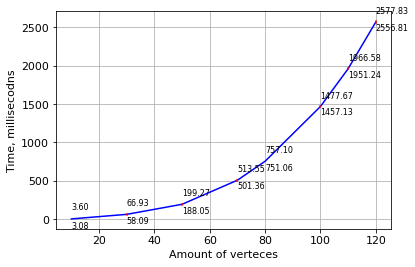

In [29]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()

font = {'family' : 'DejaVu Sans',
        'weight' : '300',
        'size'   : 8}

matplotlib.rc('font', **font)

ax.plot(x_mean, means, color="blue")
for i in range(len(x_mean)):
    ax.plot([x_mean[i],x_mean[i]],errors[i],color="red")
    ax.text(x_mean[i],errors[i][0]+120,"{:.2f}".format(errors[i][1]))
    ax.text(x_mean[i],errors[i][1]-120,"{:.2f}".format(errors[i][0]))
    
ax.grid()
plt.xlabel('Amount of verteces')
plt.ylabel('Time, millisecodns')

plt.show()
fig.savefig("plot.png",dpi=600)